# Análisis de Tensión Plana usando una Malla de Gmsh

Este notebook lee el archivo de malla (`.msh`) generado por Gmsh, configura y resuelve el problema de tensión plana usando la librería `mnspy`.

El flujo de trabajo es:
1.  Importar la malla y las propiedades del material.
2.  Utilizar los "Grupos Físicos" definidos en Gmsh para aplicar cargas y condiciones de frontera.
3.  Ensamblar y resolver el sistema de ecuaciones.
4.  Visualizar los resultados (deformada y contornos de esfuerzo).

In [1]:
from mnspy import Nodo, TriangularCST, Ensamble, importar_gmsh
from scipy.linalg import cho_factor, cho_solve

### Paso 1: Importar la Malla y los Datos del Problema

In [2]:
# La función `importar_gmsh` lee el archivo .msh y crea los objetos Nodo y TriangularCST.
# Devuelve los nodos, los elementos y un diccionario con los nodos pertenecientes a cada grupo físico.
dict_nodos, lista_elementos, dict_grupos_fisicos = importar_gmsh(
    "./ejem_1.msh", E=200E9, espesor=0.01, coef_poisson=0.3
)

Info    : Reading './ejem_1.msh'...
Info    : 14 entities
Info    : 904 nodes
Info    : 1672 elements
Info    : Done reading './ejem_1.msh'


### Paso 2: Aplicar Condiciones de Frontera y Cargas

In [3]:
# Iteramos sobre los IDs de los nodos en los grupos físicos para aplicar las condiciones.
# Esto demuestra la potencia de definir grupos físicos en el pre-procesador.

# Aplicamos una carga total de 40000 N distribuida entre los nodos del borde derecho.
fuerza_total = 40000
nodos_cargados = dict_grupos_fisicos['lado_cargas']
fuerza_por_nodo = fuerza_total / len(nodos_cargados)

for id in nodos_cargados:
    dict_nodos[id].agregar_fuerza_externa(fuerza_por_nodo, 'x')

In [4]:
# Fijamos los desplazamientos en el borde izquierdo (empotramiento).
for id in dict_grupos_fisicos['lado_fijo']:
    dict_nodos[id].ajustar_grado_libertad('x', False)
    dict_nodos[id].ajustar_grado_libertad('y', False)

### Paso 3: Ensamble y Solución del Sistema

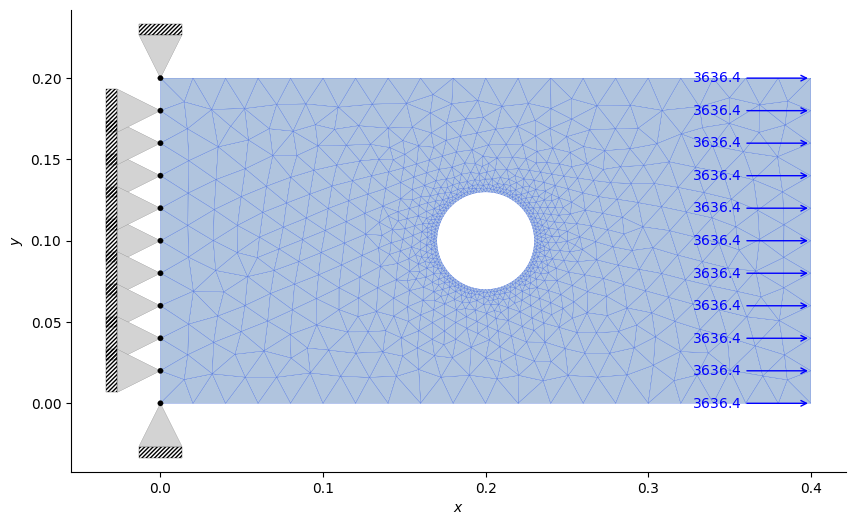

In [5]:
# Creamos el objeto Ensamble y visualizamos la configuración del problema.
ens = Ensamble(lista_elementos)
ens.diagrama_cargas(True, True, False, False)

In [6]:
# 1. Con el paquete mnspy
# Solución por defecto
# ens.solucionar_por_gauss_y_calcular_reacciones()

# Se puede usar el solver por defecto de mnspy o uno externo como SciPy.
# Aquí usamos la descomposición de Cholesky de SciPy, que es eficiente para matrices simétricas definidas positivas.
A, b, etq = ens.get_sistema_reducido()
u, l = cho_factor(A)
sol = cho_solve((u, l), b)
ens.calcular_reacciones(sol)

In [7]:
print("--- Desplazamientos Nodales (Solución) ---")
ens.solucion()

--- Desplazamientos Nodales (Solución) ---


Desplazamientos,Reacciones
$\color{blue}u_{575}=2.236947705 \times 10^{-5}$,$\cancel{F_{575x}}$
$\color{blue}v_{575}=-4.366315472 \times 10^{-6}$,$\cancel{F_{575y}}$
$\color{blue}u_{209}=2.304320696 \times 10^{-5}$,$\cancel{F_{209x}}$
$\color{blue}v_{209}=-4.320076488 \times 10^{-6}$,$\cancel{F_{209y}}$
$\color{blue}u_{781}=2.186536786 \times 10^{-5}$,$\cancel{F_{781x}}$
$\color{blue}v_{781}=-4.450841687 \times 10^{-6}$,$\cancel{F_{781y}}$
$\color{blue}u_{171}=2.293103204 \times 10^{-5}$,$\cancel{F_{171x}}$
$\color{blue}v_{171}=-3.933695816 \times 10^{-6}$,$\cancel{F_{171y}}$
$\color{blue}u_{551}=2.249935779 \times 10^{-5}$,$\cancel{F_{551x}}$
$\color{blue}v_{551}=-4.103076207 \times 10^{-6}$,$\cancel{F_{551y}}$


### Paso 4: Post-procesamiento y Visualización de Resultados

--- Deformada de la Placa ---


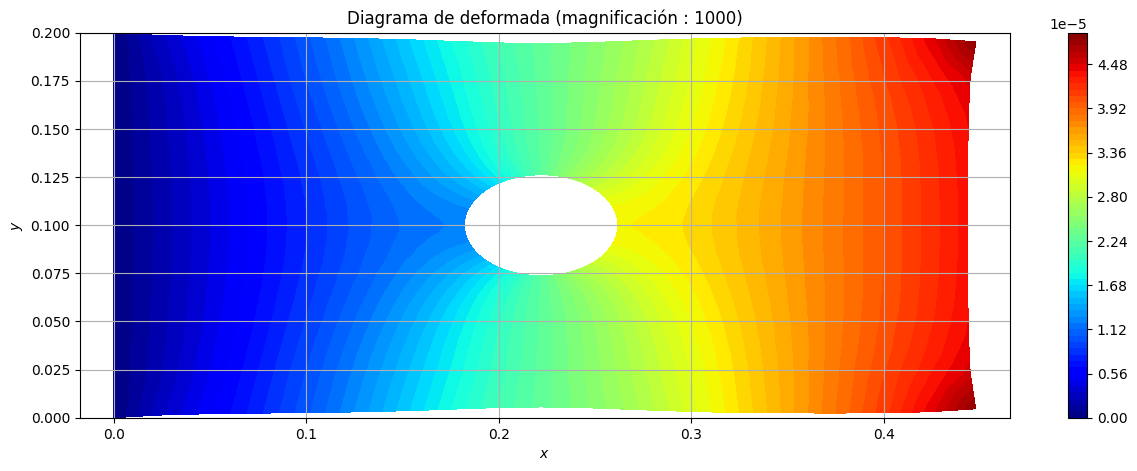

In [8]:
print("--- Deformada de la Placa ---")
ens.deformada(magnificacion=1000, mostrar_nodos=False)

--- Diagrama de Esfuerzo de Von Mises ---


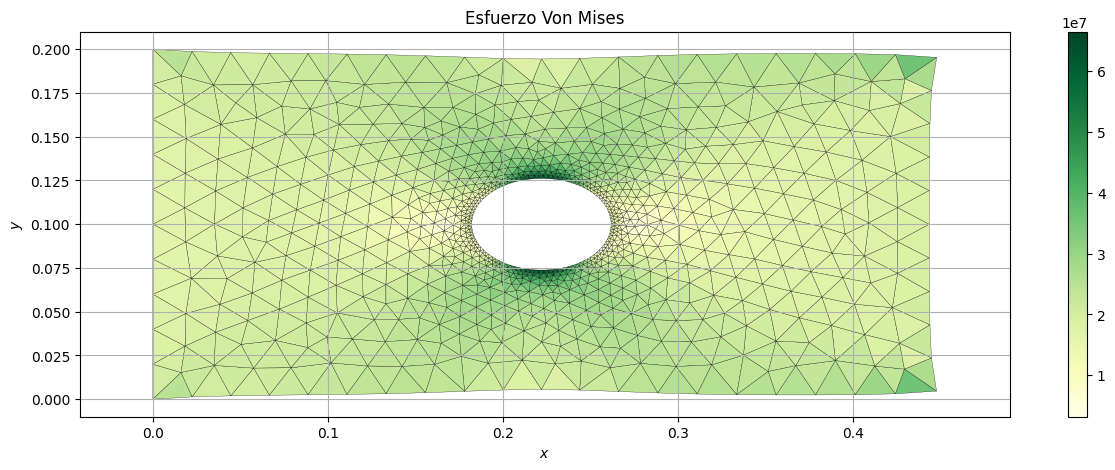

In [9]:
print("--- Diagrama de Esfuerzo de Von Mises ---")
# Se observa la clara concentración de esfuerzos en la parte superior e inferior del agujero.
ens.diagrama_de_esfuerzo_von_mises(magnificacion=1000, mostrar_nodos=False)

--- Diagrama de Esfuerzo Normal en X (σx) ---


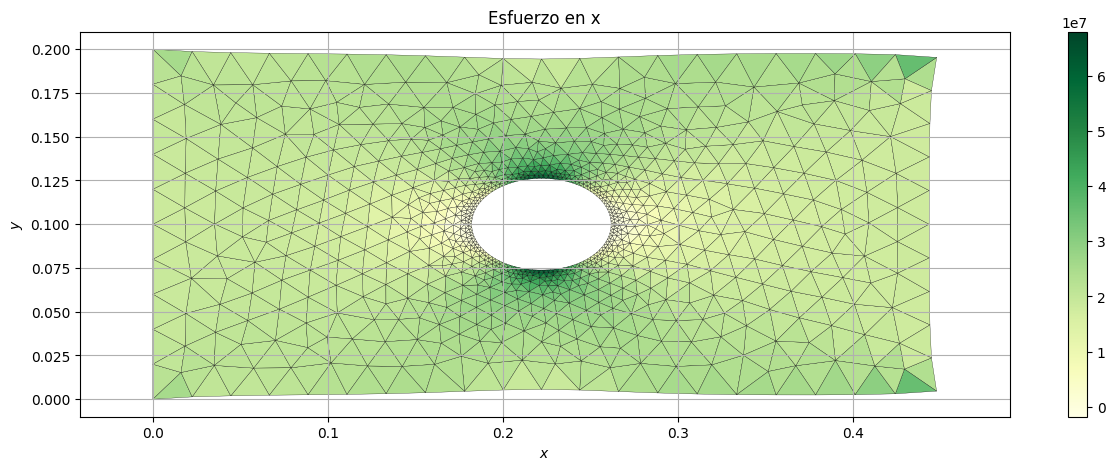

In [10]:
print("--- Diagrama de Esfuerzo Normal en X (σx) ---")
# El esfuerzo σx es máximo en los bordes del agujero y se distribuye a lo largo de la placa.
ens.diagrama_de_esfuerzo_x(magnificacion=1000, mostrar_nodos=False)

--- Diagrama de Esfuerzo Normal en Y (σy) ---


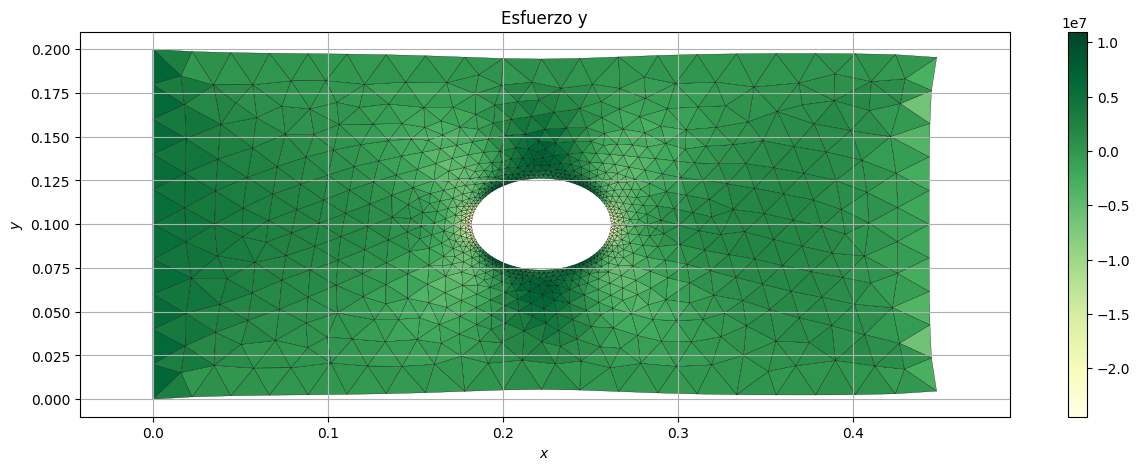

In [11]:
print("--- Diagrama de Esfuerzo Normal en Y (σy) ---")
ens.diagrama_de_esfuerzo_y(magnificacion=1000, mostrar_nodos=False)


--- Diagrama de Esfuerzo Cortante (τxy) ---


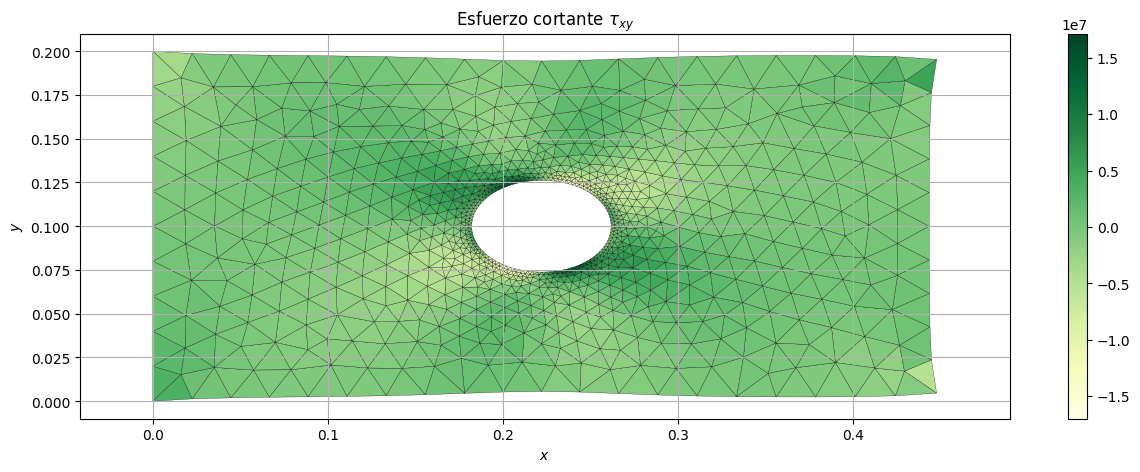

In [12]:
print("\n--- Diagrama de Esfuerzo Cortante (τxy) ---")
ens.diagrama_de_esfuerzo_cortante(magnificacion=1000, mostrar_nodos=False)

### Paso 5: Inspección de Resultados Numéricos

In [13]:
# Podemos inspeccionar un elemento específico para ver sus esfuerzos numéricos.
elemento_critico = ens.get_elemento('87')
elemento_critico

TriangularCST: 87

In [14]:
print("--- Datos del elemento con mayor esfuerzo (cercano al agujero) ---")
elemento_critico.esfuerzos()

--- Datos del elemento con mayor esfuerzo (cercano al agujero) ---


,Esfuerzos
$\sigma_{x}$,1.68731e+07
$\sigma_{y}$,-5.11883e+06
$\tau_{xy}$,5.9125e+06


In [15]:
print("--- Datos del elemento con mayor esfuerzo (cercano al agujero) ---")
elemento_critico.esfuerzo_von_mises()

--- Datos del elemento con mayor esfuerzo (cercano al agujero) ---


,Esfuerzo de Von Mises
$\sigma_{vm}$,2.24086e+07
